<a href="https://colab.research.google.com/github/ZefraAlseif/Music-Recommendation/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 

A machine learning algorithm if a user will like a music based on audio parameters.

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import sklearn 
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import copy
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from google.colab import files
import os, shutil, pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import regularizers
from sklearn.utils import validation
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Uploading Kaggle JSon File

In [ ]:
files.upload() # Upload the Json File located corresponding to the user

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zefraalseif","key":"5fccb85b3a64f22d31f5d4836bddf9e5"}'}

# Removing/Creating Directory for Kaggle Dataset

In [ ]:
!rm -r ~/.kaggle/ 
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/': No such file or directory


# Importing Dataset

In [ ]:
!kaggle datasets download -d geomack/spotifyclassification
!kaggle datasets download -d vatsalmavani/spotify-dataset

100% 98.4k/98.4k [00:00<00:00, 492kB/s]
100% 98.4k/98.4k [00:00<00:00, 491kB/s]
 91% 15.0M/16.5M [00:01<00:00, 24.2MB/s]
100% 16.5M/16.5M [00:01<00:00, 15.4MB/s]


# Unzipping Dataset

In [ ]:
!unzip -qq spotifyclassification.zip
!unzip -qq spotify-dataset.zip

# Data Splits

In [ ]:
# Specify the data (remove time_signature & reorder the data)
data = pd.read_csv("data.csv")
data.drop('time_signature',inplace =True, axis =1)
data.head()
X1 = data.iloc[:,1:13]
y = np.ravel(data.target)


#Splitting the data set for training and validating - Done with SKLEARN
X_train, X_tst, y_train, y_tst = train_test_split(X1,y, test_size = 0.25, random_state = 45)
# Defining numpy arrays for the Train and Validation 
X_train = X_train.to_numpy()
# X_valid = X_valid.to_numpy()

# X_val = X_valid[:300]
# X_tst = X_valid[300:]

# y_val = y_valid[:300]
# y_tst = y_valid[300:]

# Normalizing Test

In [ ]:
import copy
Xtrain_N = copy.copy(X_train)
Xtst_N = copy.copy(X_tst)
mean = Xtrain_N.mean(axis=0)
std = Xtrain_N.std(axis=0)
Xtrain_N -= mean
Xtrain_N /= std
Xtst_N -=mean 
Xtst_N /=std

# MLPClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

              precision    recall  f1-score   support

           0       0.68      0.81      0.74       242
           1       0.78      0.65      0.71       263

    accuracy                           0.72       505
   macro avg       0.73      0.73      0.72       505
weighted avg       0.73      0.72      0.72       505



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X h

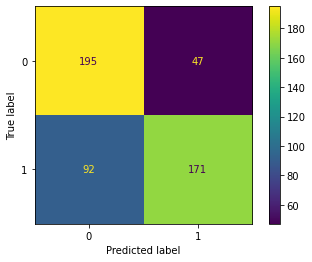

In [ ]:
parameters = {'activation':('relu','none'),'solver':('lbfgs','sgd','adam'),'learning_rate':('constant','invscaling','adaptive')}
clf = MLPClassifier(hidden_layer_sizes= (200,150,100,50,25))
grid_MLP = GridSearchCV(clf,parameters)
optimal_MLP = grid_MLP.fit(Xtrain_N,y_train)
optimal_MLP.score(Xtst_N,y_tst)
print(classification_report(y_tst, optimal_MLP.predict(Xtst_N)))
plot_confusion_matrix(optimal_MLP, Xtst_N, y_tst)  
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver ='adam',hidden_layer_sizes= (200,150,100,50,25))
clf.fit(Xtrain_N,y_train)
clf.score(Xtst_N,y_tst)
print(classification_report(y_tst, clf.predict(Xtst_N)))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       242
           1       0.76      0.71      0.74       263

    accuracy                           0.73       505
   macro avg       0.74      0.74      0.73       505
weighted avg       0.74      0.73      0.73       505



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


## MLP Classifier Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


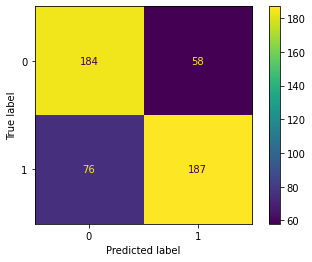

In [ ]:
plot_confusion_matrix(clf, Xtst_N, y_tst)  
plt.show()

# Gaussian Naive Bayes Classifier

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain_N, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(Xtst_N)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_tst, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 67.12871287128714


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# KNN Classifier

In [ ]:
parameters = {'n_neighbors':[x for x in range(1,100)], 'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2]}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, parameters)
optimal_knn = grid_knn.fit(Xtrain_N,y_train)

In [ ]:
optimal_knn.score(Xtst_N,y_tst)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.7069306930693069

Classification Report KNN Classifier

In [ ]:
print(classification_report(y_tst, optimal_knn.predict(Xtst_N)))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       242
           1       0.79      0.59      0.68       263

    accuracy                           0.71       505
   macro avg       0.72      0.71      0.70       505
weighted avg       0.73      0.71      0.70       505



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## KNN Classifier Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


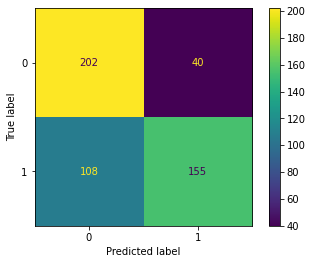

In [ ]:
plot_confusion_matrix(optimal_knn, Xtst_N, y_tst)  
plt.show()

# Decision Tree Classifier

In [ ]:
parameters_tree = {'criterion':('gini','entropy','log_loss'), 'splitter':('best','random')}
decision_tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(decision_tree,parameters_tree)
optimal_tree = grid_tree.fit(Xtrain_N,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailed

In [ ]:
optimal_tree.score(Xtst_N,y_tst)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.7247524752475247

Classification Report Decision Tree Classifier

In [ ]:
print(classification_report(y_tst, optimal_tree.predict(Xtst_N)))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       242
           1       0.73      0.74      0.74       263

    accuracy                           0.72       505
   macro avg       0.72      0.72      0.72       505
weighted avg       0.72      0.72      0.72       505



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## Decision Tree Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


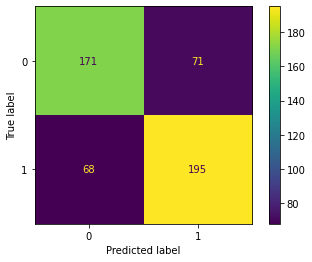

In [ ]:
plot_confusion_matrix(optimal_tree, Xtst_N, y_tst)  
plt.show()

# SVM Classifier

In [ ]:
parameters_svc = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'gamma':('scale','auto'), 'shrinking':(True,False),'C':[x for x in range(1,5)]}
support_vector = SVC()
grid_svc = GridSearchCV(support_vector,parameters_svc)
optimal_svc = grid_svc.fit(Xtrain_N,y_train)

In [ ]:
optimal_svc.score(Xtst_N,y_tst)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.7504950495049505

Classification Report SVM Classifier

In [ ]:
print(classification_report(y_tst, optimal_svc.predict(Xtst_N)))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       242
           1       0.81      0.68      0.74       263

    accuracy                           0.75       505
   macro avg       0.76      0.75      0.75       505
weighted avg       0.76      0.75      0.75       505



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## Support Vector Machine Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


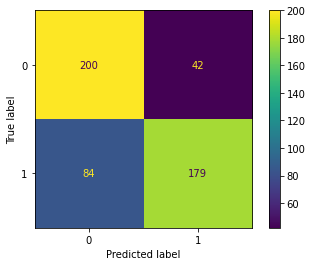

In [ ]:
plot_confusion_matrix(optimal_svc, Xtst_N, y_tst)  
plt.show()

# Random Forest Classifier

In [ ]:
parameters_randomf = {'criterion':('gini','entropy','log_loss'), 
                      'n_estimators':[x for x in range(1,50)]}
random_forest = RandomForestClassifier()
grid_randomf = GridSearchCV(random_forest,parameters_randomf)
optimal_randomf = grid_randomf.fit(Xtrain_N,y_train)
optimal_randomf.score(Xtst_N,y_tst)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
245 fits failed out of a total of 735.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

0.8158415841584158

In [ ]:
optimal_randomf.score(Xtst_N,y_tst)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8158415841584158

Classification Report Random Forest Classifier

In [ ]:
print(classification_report(y_tst,optimal_randomf.predict(Xtst_N)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       251
           1       0.81      0.83      0.82       254

    accuracy                           0.82       505
   macro avg       0.82      0.82      0.82       505
weighted avg       0.82      0.82      0.82       505



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Random Forest Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


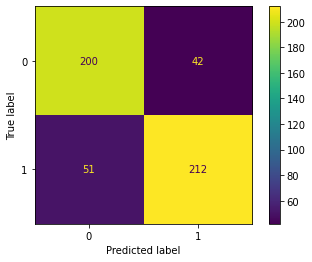

In [ ]:
plot_confusion_matrix(optimal_randomf, Xtst_N, y_tst)  
plt.show()

# Second Dataset Recommendation

In [ ]:
dataBase = pd.read_csv('data/data.csv')
song_artist_id = dataBase[['artists','id','name']].copy()
dataBase.drop('artists',inplace = True, axis = 1)
dataBase.drop('id',inplace = True, axis = 1)
dataBase.drop('name',inplace = True, axis = 1)
dataBase.drop('year',inplace= True, axis = 1)
dataBase.drop('explicit',inplace = True, axis = 1)
dataBase.drop('popularity',inplace = True, axis = 1)
dataBase.drop('release_date',inplace = True, axis = 1)
dataBase = dataBase[['acousticness','danceability','duration_ms','energy','instrumentalness','key', 'liveness','loudness','mode','speechiness','tempo','valence']]
X2 = dataBase.iloc[:,:]
songDB = X2.to_numpy()
songDB
songDB_N = copy.copy(songDB)
mean2 = songDB_N.mean(axis=0)
std2 = songDB_N.std(axis=0)
songDB_N -= mean
songDB_N /= std
# songDB_N -= mean2
# songDB_N /= std2

In [ ]:
# order recommendation
probArr = optimal_randomf.predict_proba(songDB_N)
PDF = [i for i in probArr[:,1]]
song_artist_id['Probabiltiy'] = PDF
song_artist_id =song_artist_id.sort_values(by=['Probabiltiy'],ascending=False)
song_artist_id

,artists,id,name,Probabiltiy
148465,['Patrice Rushen'],37VzvL5Zu21ogLgKm0J8lY,Get Off (You Fascinate Me),1.0
100245,['Meco'],1CarOKwggz4XkxFfr09sRp,"Medley: Star Wars - 12"" Version",1.0
101009,['Bohannon'],4fW5B7Dp2hJoyMKbg4tkxg,Take the Country to New York City,1.0
100877,['Bernard Wright'],0tUYG0VaHjQDbdNQFawtDY,Spinnin',1.0
100646,['Black Ivory'],0iijpRubQCC5cBUGd0U8sf,Mainline,1.0
...,...,...,...,...
50937,"['Wolfgang Amadeus Mozart', 'Capella Istropoli...",7va2xRMFprSkJAjPvFipvF,"Symphony No. 28 in C Major, K. 200: II. Andante",0.0
138448,['Shinedown'],5AtRcGbmFeHtnbQ4k93UW7,Second Chance,0.0
156053,"['Sergei Rachmaninoff', 'William Kapell', 'Edm...",5g73emlmJYrMA25OL4lT1L,"Cello Sonata in G Minor, Op. 19: III. Andante",0.0
51176,"['Ludwig van Beethoven', 'Pinchas Zukerman', '...",6PvNbpPdHtKi4b2i3VXp17,"Violin Romance No.1 In G Major, Op.40",0.0
